# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

## Inicialización

In [496]:
# Carga las librerías
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
from scipy import stats as st

Las liberías necesarias y que podría considerar para este proyecto.

## Cargar datos

In [497]:
# Carga los archivos de datos en diferentes DataFrames
calls = pd.read_csv('megaline_calls.csv')
internet = pd.read_csv('megaline_internet.csv')
messagges = pd.read_csv('megaline_messages.csv')
plans = pd.read_csv('megaline_plans.csv')
users = pd.read_csv('megaline_users.csv')

Se cargaron las 5 tablas necesarias para llevar a acabo este proyecto.

## Preparar los datos

### Vizualación de los 5 tablas para asegurarnos que se cargaron correctamente y como están elaboradas.

In [498]:
calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [499]:
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [500]:
messagges.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [501]:
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [502]:
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


### Calculamos la dimensión de las 5 tablas.
Obervamos que no tiene valores nulos, por lo que no es necesario aplicar ningún método para tratar con valores nulos.

In [503]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [504]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [505]:
messagges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [506]:
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [507]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


### Filas duplicadas
Calculamos en esta sección si en algunas de las tablas hay filas duplicadas. No hay ninguna fila duplicada con le que hay que lidiar.

In [508]:
calls[calls.duplicated()]

,id,user_id,call_date,duration


In [509]:
internet[internet.duplicated()]

,id,user_id,session_date,mb_used


In [510]:
messagges[messagges.duplicated()]

,id,user_id,message_date


In [511]:
plans[plans.duplicated()]

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name


In [512]:
users[users.duplicated()]

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date


En esta sección se validaron que los datos se hayan cargado corectamente. Obervamos cuál es el volimen de cada tabla y los valores no nulos que tiene. Al igual que los valores duplicados. El nombre de las columnas también parecen estar con un buen formato.

## Tarifas

In [513]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [514]:
# Imprime una muestra de los datos para las tarifas
plans.sample()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf


In [515]:
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


La tabla `plans` tiene una dimensión de 8 columnas x 2 filas, de las cuales no tienen ningún valor nulo. Sin embargo, podemos decir que si hay valores no adecuados, ya que  Megaline redondea los megabytes a gigabytes, y tenenos una columna, que es `mb_per_month_included` la cantidad de mb mensual que tienen los dos planes.  Por lo tanto se puede crear una columna llamada `gb_per_month_included` que muestra al conversión.

## Corregir datos

In [516]:
plans['gb_per_month_included'] = plans['mb_per_month_included'] / 1_024

In [517]:
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


Hicimos la conversión de megabytes a gigabytes. Aquí e simportante considerar usar la función de math.ceil() cuando redondeamos hacia arriba lo valores, dado que si lo que hacemos es transformalos a int solamente eliminamos la parte decimal y para este ejercicio debemos hacer el redondeo superior dado que se cobra el costo extra en cuanto se pasa de los límites.

## Enriquecer los datos

Lo que puede ser de mucha utilidad y que la tabla sea un poco mas específica es pasar la la columna `plan_name` como índice
    y eliminar la la columna `mb_per_month_included` ya que ya no es necesaria. Al final solo me decidí por eliminar la columna `mb_per_month_included` y no pasar plan_name como índice. Debido a que puede hacerme util para unir dataframes si es necesario.

In [518]:
#plans = plans.set_index('plan_name')
plans = plans.drop(columns=['mb_per_month_included'])

In [519]:
plans

,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,500,20,10,0.03,0.03,surf,15.0
1,1000,3000,70,7,0.01,0.01,ultimate,30.0


## Usuarios/as

In [520]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [521]:
# Imprime una muestra de datos para usuarios

users.sample(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
335,1335,Gail,Coleman,61,"Dallas-Fort Worth-Arlington, TX MSA",2018-06-02,surf,NaN
437,1437,Louis,Neal,42,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-12,surf,NaN
227,1227,Vanesa,Willis,29,"Dallas-Fort Worth-Arlington, TX MSA",2018-01-17,surf,NaN
397,1397,Willow,Steele,70,"Oklahoma City, OK MSA",2018-06-01,surf,NaN
485,1485,Damion,Woodard,67,"Nashville-Davidson–Murfreesboro–Franklin, TN MSA",2018-08-21,surf,NaN


In [522]:
# users['churn_date'].value_counts(dropna=False)

In [523]:
nan_values_churn_date = users['churn_date'].isna().sum()
f'Hay {nan_values_churn_date} en la columna churn_date'

'Hay 466 en la columna churn_date'

El df de `users` tiene una dimensión de 8 columnas x 500 filas. La única columna que tiene valores nulos es `churn_date` con 466; si el valor es ausente, la tarifa se estaba usando cuando fue extraída esta base de datos. La mayoría de las columnas son objetos y dos ellos, `reg_date` y `churn_date`, se pueden pasar a formato de fecha.

### Corregir los datos

In [524]:
#users['churn_date'] = users['churn_date'].fillna(pd.NaT)

In [525]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'],errors='coerce', format='%Y-%m-%d')

In [526]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


Para pasar a formato fecha en las dos columnas ya anteriormente mencionadas, primero tuve que convertir los valors NaN a NaT (not a time) con el método `fillna` y `atributo pd.NaT`.
Nuavemente consulté la información general del df.
Lo que también se pudo hacer es aplicar el parametro `errors='coerce'` para evitar erroes al cambiar el tipo de valor.

### Enriquecer los datos

In [527]:
users['full_name'] = users['first_name'] + ' ' + users['last_name']

In [528]:
users = users.drop(columns='churn_date')

In [529]:
users.sample(5)

,user_id,first_name,last_name,age,city,reg_date,plan,full_name
349,1349,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",2018-10-01,surf,Florentina Diaz
138,1138,Arlie,Higgins,66,"Riverside-San Bernardino-Ontario, CA MSA",2018-02-06,surf,Arlie Higgins
61,1061,Maryam,Valencia,38,"Columbia, SC MSA",2018-03-08,ultimate,Maryam Valencia
13,1013,Nicolas,Snider,50,"Knoxville, TN MSA",2018-12-01,ultimate,Nicolas Snider
15,1015,Beata,Carpenter,26,"Pittsburgh, PA MSA",2018-12-05,surf,Beata Carpenter


Lo que se me ocurrió a agregar es una columna que muestre el nombre completo y eliminar la columns `churn_date`. Sobre la columna `churn_date` se descartó debido a que la mayoría de loa valores son nulos y no yay forma de saberlos para llenarlos. análisis
En todo los demás me parece que no es necesario hacer ningún otro cambio.

## Llamadas

In [530]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [531]:
# Imprime una muestra de datos para las llamadas
calls.sample(20,random_state=7659)

,id,user_id,call_date,duration
4740,1022_6,1022,2018-08-19,0.00
94987,1336_938,1336,2018-11-13,0.00
76871,1276_131,1276,2018-10-31,0.00
67248,1241_84,1241,2018-10-16,10.26
78334,1280_391,1280,2018-10-31,2.44
59001,1214_70,1214,2018-03-25,1.76
83787,1305_236,1305,2018-11-22,0.00
67991,1246_10,1246,2018-03-12,0.00
133251,1483_26,1483,2018-08-01,9.54
73564,1261_324,1261,2018-12-21,9.74


Viendo la información general, no hay valores nulos. Sin embargo; observé que se registraron llamadas con una duración de 0.00 segundos. Usuarios colgaron la llamada a la velocidad de la luz justo en el momento en el que empezó el cronómetro de la llamada ¿Se cobran o no se cobran? Como es un registró tomaré que sí se cobran. Adicional, es algo que se debería aclarar con la empresa, bueno es no es nuestro análisis.
Otro dato curioso que note es que el id de la llamada es un objeto debido al guión bajo (_). Podemos separarlo; exlpicación que se lleva acabo más adelante.

### Corregir los datos

In [532]:
#Redondeo hacia arriba
calls['duration'] = np.ceil(calls['duration'])

In [533]:
#Sustuir lo valores 0 con 1
calls['duration'] = calls['duration'].where(~(calls['duration'] == 0),1)

In [534]:
#Pasar a entero la columna duration
calls['duration'] = calls['duration'].astype('int')

In [535]:
#Cambiar el formato a datetime la columna call_date
calls['call_date'] = pd.to_datetime(calls['call_date'])

In [536]:
calls.sample(20,random_state=7659)

,id,user_id,call_date,duration
4740,1022_6,1022,2018-08-19,1
94987,1336_938,1336,2018-11-13,1
76871,1276_131,1276,2018-10-31,1
67248,1241_84,1241,2018-10-16,11
78334,1280_391,1280,2018-10-31,3
59001,1214_70,1214,2018-03-25,2
83787,1305_236,1305,2018-11-22,1
67991,1246_10,1246,2018-03-12,1
133251,1483_26,1483,2018-08-01,10
73564,1261_324,1261,2018-12-21,10


In [537]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(1)
memory usage: 3.7+ MB


En la columna `duration`, para cambiar el valor de flotante a entero, se redonde hacia arriba los decimales y se sustituyeron los valores de 0 a 1.
Posteriormente, cambié el formato fecha la columna *call_date*.
Finalmente, corroboré nuevamente la información general para observar los cambios mencionados.

### Enriquecer los datos

In [538]:
#Dividimos el id para solo tener el numerod de la derecha
new_id = calls['id'].str.split('_', expand=True).rename(columns={1:'new_id'})['new_id']

In [539]:
#Creo una nueva columna en calls
calls['id_call'] = new_id

In [540]:
calls['id_call'] = calls['id_call'].astype('int')

In [541]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  int32         
 4   id_call    137735 non-null  int32         
dtypes: datetime64[ns](1), int32(2), int64(1), object(1)
memory usage: 4.2+ MB


In [542]:
#Funcion quitar el user_id y _
def split_id(data,column_name=''):
    return data.str.split('_', expand=True).rename(columns={1:column_name})[column_name]

Lo que hice para poder enriquecer los datos es dividir el id de llamada. La fórmula para crear el id es: user_id + '_' + id_call. Aqui creamos una columna donde solo tenga el número que está después del guión bajo. La columna se llama `id_call` y no borramos la original; id. Además la columna `id_call` podemos convertirla a entero.
Una observación es que esto debemos hacerlo en todo los dataframes, que tenga el id de esa forma asi que vamos a crear una función llamada `split_id`.

## Mensajes

In [543]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
messagges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [544]:
# Imprime una muestra de datos para los mensajes
messagges.sample(20,random_state=67598)

,id,user_id,message_date
10069,1076_171,1076,2018-10-29
47326,1324_39,1324,2018-12-02
16614,1111_107,1111,2018-12-07
37067,1247_231,1247,2018-08-14
29614,1183_9,1183,2018-11-15
46598,1316_526,1316,2018-11-21
32201,1199_444,1199,2018-10-07
67171,1435_209,1435,2018-11-25
74377,1476_142,1476,2018-11-22
44482,1295_183,1295,2018-12-10


La información es parecida a los dataframes anteriores. Hay una columna que se puede convertir en formato de fecha y crear una columna para el nuevo id de los mensajes.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [545]:
messagges['message_date'] = pd.to_datetime(messagges['message_date'])

In [546]:
messagges.sample(20,random_state=67598)

,id,user_id,message_date
10069,1076_171,1076,2018-10-29
47326,1324_39,1324,2018-12-02
16614,1111_107,1111,2018-12-07
37067,1247_231,1247,2018-08-14
29614,1183_9,1183,2018-11-15
46598,1316_526,1316,2018-11-21
32201,1199_444,1199,2018-10-07
67171,1435_209,1435,2018-11-25
74377,1476_142,1476,2018-11-22
44482,1295_183,1295,2018-12-10


### Enriquecer los datos

In [547]:
messagges['id_messagges'] = split_id(messagges['id'])
messagges['id_messagges'] = messagges['id_messagges'].astype('int')

In [548]:
messagges.sample(5,random_state=67598)

,id,user_id,message_date,id_messagges
10069,1076_171,1076,2018-10-29,171
47326,1324_39,1324,2018-12-02,39
16614,1111_107,1111,2018-12-07,107
37067,1247_231,1247,2018-08-14,231
29614,1183_9,1183,2018-11-15,9


In [549]:
messagges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
 3   id_messagges  76051 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(1)
memory usage: 2.0+ MB


Como mencioné en un puntos anteriores, podemos crear una columna para tener un id mas claro. el nuevo id de mensajes es `id_messages`.

## Internet

In [550]:
# Imprime la información general/resumida sobre el DataFrame de internet
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [551]:
# Imprime una muestra de datos para el tráfico de internet
internet.sample(12,random_state=76569)

,id,user_id,session_date,mb_used
70285,1328_244,1328,2018-06-16,428.11
87523,1405_328,1405,2018-11-28,104.47
44811,1198_185,1198,2018-10-26,379.37
65526,1302_72,1302,2018-11-19,251.83
96618,1454_74,1454,2018-08-07,228.77
101904,1488_315,1488,2018-05-23,325.04
21771,1099_526,1099,2018-12-16,229.69
5960,1033_21,1033,2018-11-26,631.07
81788,1383_366,1383,2018-11-06,108.66
17562,1079_167,1079,2018-08-28,839.55


En este df, lo único considerable es crea el nuevo id sin el guión bajo, cambiar el formato fecha, y hacer la conversión de Megas a Gigas.

### Corregir los datos

In [552]:
internet['session_date'] = pd.to_datetime(internet['session_date'])
internet['gb_used'] = internet['mb_used'] / 1_024
internet['id_internet'] = split_id(internet['id'])
internet['id_internet'] = internet['id_internet'].astype('int')

In [553]:
internet.sample(12)

,id,user_id,session_date,mb_used,gb_used,id_internet
1336,1008_47,1008,2018-10-06,165.31,0.161436,47
96597,1454_53,1454,2018-09-06,210.59,0.205654,53
68382,1320_46,1320,2018-07-24,397.94,0.388613,46
28901,1132_347,1132,2018-11-26,666.32,0.650703,347
91703,1424_100,1424,2018-12-25,290.73,0.283916,100
96809,1456_51,1456,2018-11-02,491.76,0.480234,51
75831,1357_132,1357,2018-07-19,424.41,0.414463,132
83262,1389_149,1389,2018-07-29,536.71,0.524131,149
1356,1008_67,1008,2018-11-29,362.70,0.354199,67
14479,1066_373,1066,2018-04-27,0.00,0.000000,373


### Enriquecer los datos

In [554]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   gb_used       104825 non-null  float64       
 5   id_internet   104825 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(1)
memory usage: 4.4+ MB


Corroboramos la información general para asegurarnos de los cambios establecidos.

## Estudiar las condiciones de las tarifas

In [555]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
plans

,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,500,20,10,0.03,0.03,surf,15.0
1,1000,3000,70,7,0.01,0.01,ultimate,30.0


La tabla plans (datos sobre las tarifas):
 
`plan_name`: nombre de la tarifa.
`usd_monthly_pay`: pago mensual en dólares estadounidenses.
`minutes_included`: minutos incluidos al mes (calls).
`messages_included`: SMS incluidos al mes.
`gb_per_month_included`: datos incluidos al mes (en gigabytes).
`usd_per_minute`: precio por minuto tras exceder los límites del paquete (por ejemplo, si el paquete incluye 100 minutos, el operador cobrará el minuto 101).
`usd_per_message`: precio por SMS tras exceder los límites del paquete.
`usd_per_gb`: precio por gigabyte de los datos extra tras exceder los límites del paquete (1 GB = 1024 megabytes).

## Agregar datos por usuario.

In [556]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
calls['month'] = calls['call_date'].dt.month #Extraer el mes de la columna call_date
# #con el método group_by
# grp_calls = calls.groupby(['user_id','call_date_month'])
# calls_per_user = grp_calls.count()[['id_call']].sort_values(by='id_call',ascending=False)
# calls_per_user
#con el método pivot_table
calls_per_user = pd.pivot_table(calls, values='id_call', 
               index=['user_id','month'], 
                aggfunc='count').sort_values(by='id_call',ascending=False).reset_index()
calls_per_user

,user_id,month,id_call
0,1267,12,205
1,1329,12,191
2,1382,8,182
3,1240,9,180
4,1365,12,180
...,...,...,...
2253,1339,11,1
2254,1339,9,1
2255,1310,11,1
2256,1094,10,1


In [557]:
#Corroborando que los métodos usados se hicieron para los calculos correctos.
mask = "user_id == 1329 and month == 12"
calls.query(mask)['id_call'].count()

191

In [558]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
# #con el método groupby
# grp_user_month = calls.groupby(['user_id','call_date_month'])
# min_used_monthly_per_user = grp_user_month.sum()[['duration']].sort_values(by='duration',ascending=False)
# min_used_monthly_per_user
#con el método pivot_table
min_used_monthly_per_user = pd.pivot_table(calls, 
               values='duration', 
               index=['user_id','month'], 
               aggfunc='sum').sort_values(by='duration',ascending=False).reset_index()
min_used_monthly_per_user

,user_id,month,duration
0,1267,12,1548
1,1329,12,1404
2,1365,12,1390
3,1324,11,1329
4,1382,8,1324
...,...,...,...
2253,1371,10,6
2254,1414,8,5
2255,1339,9,2
2256,1407,11,2


In [559]:
#Corroborando que los métodos se hicieron para los calculos correctos.
mask = '(user_id == 1329) and (month == 12)'
calls.query(mask)["duration"].sum()

1404

In [560]:
#Corroborando de otra forma mi resultado anterior con el user_id 1267 y el mes de diciembre (12)
mask = '(user_id == 1267) and (month == 12)'
f'El usuario 1267 gastó {calls.query(mask)["duration"].sum()} minutos en el mes de diciembre.'

'El usuario 1267 gastó 1548 minutos en el mes de diciembre.'

In [561]:
#Calcula la cantidad de minutos usados por cada usuario al mes y  el número de llamadas hechas por cada usuario al mes en una sola linea.
grp = calls.groupby(['user_id','month'])
agg_dict = {'id_call':'count','duration':'sum'}
grp.agg(agg_dict)

id_call  duration
user_id month                   
1000    12          16       124
1001    8           27       187
        9           49       326
        10          65       411
        11          64       441
...                ...       ...
1498    12          39       346
1499    9           41       352
        10          53       397
        11          45       314
        12          65       505

[2258 rows x 2 columns]

Nota adiconal: Me percaté que los calculos anteriores los podría haber hecho con el método `agg` con solo dos líneas de código.

In [562]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
messagges['month'] = messagges['message_date'].dt.month
#con el método groupby
# grp = messagges.groupby(['user_id','message_date_month'])
# sent_msg_monthly_per_user = grp.count()['id_messagges'].sort_values(ascending=False)
# sent_msg_monthly_per_user
#Con pivot_table.
sent_msg_monthly_per_user = pd.pivot_table(messagges,
               values='id_messagges',
               index=['user_id','month'],
               aggfunc='count').sort_values(by='id_messagges',ascending=False).reset_index()
sent_msg_monthly_per_user

,user_id,month,id_messagges
0,1052,12,266
1,1381,10,224
2,1381,11,180
3,1328,12,168
4,1132,11,166
...,...,...,...
1801,1123,6,1
1802,1263,12,1
1803,1484,11,1
1804,1263,11,1


In [563]:
#Corroborar de otra forma si la información de la parte superior es correcta
mask = "user_id == 1052 and month == 12"
f'El usuario 1052 gastó {messagges.query(mask)["id_messagges"].count()} mensajes durante el mes de diciembre'

'El usuario 1052 gastó 266 mensajes durante el mes de diciembre'

In [564]:
#Corroborar de otra forma si la información de la parte superior es correcta
mask = "(user_id == 1381) and (month == 10 or month == 11)"
f'El usuario 1381 gastó {messagges.query(mask)["id_messagges"].count()} mensajes durante el mes de octubre y noviembre'

'El usuario 1381 gastó 404 mensajes durante el mes de octubre y noviembre'

In [565]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
internet['month'] = internet['session_date'].dt.month

# #con el método groupby
# grp = internet.groupby(['user_id','session_date_month'])
# traffic_monthly_per_user = grp.sum()['gb_used']
# traffic_monthly_per_user.sort_values(ascending=False)


#Antes de la agrupación establecer la condición de que si alguien usa 1025 mb, se le cobrará 2 gb
internet['gb_used'].where(~(internet['gb_used']==(1025/1024)),np.ceil(internet['gb_used']))


#con pivot_table
traffic_monthly_per_user = pd.pivot_table(internet,
               values='gb_used',
               index=['user_id','month'],
              aggfunc='sum').sort_values(by='gb_used',ascending=False).reset_index()
traffic_monthly_per_user

,user_id,month,gb_used
0,1379,12,69.269131
1,1121,12,65.296768
2,1292,12,50.815098
3,1292,8,50.595068
4,1240,8,48.779863
...,...,...,...
2272,1108,12,0.227705
2273,1182,5,0.126797
2274,1076,7,0.111074
2275,1452,12,0.090508


In [566]:
#Corroborar la información de otra forma.
mask = "user_id == 1379 and month == 12"
internet.query(mask)['gb_used'].sum()

69.269130859375

### Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month.

In [567]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
#calls_per_user
#min_used_monthly_per_user
#sent_msg_monthly_per_user
#traffic_monthly_per_user

In [568]:
#Primero, se cambia el nombre de la columnas para que el nombre se relacione con los datos.
calls_per_user = calls_per_user.rename(columns={'id_call':'calls_amount'})
min_used_monthly_per_user = min_used_monthly_per_user.rename(columns={'duration':'calls_duration'})
sent_msg_monthly_per_user = sent_msg_monthly_per_user.rename(columns={'id_messagges':'messages_amount'})
traffic_monthly_per_user = traffic_monthly_per_user.rename(columns={'id_internet':'used_gb'})

In [569]:
calls_per_user.sample(5,random_state=748537)

,user_id,month,calls_amount
1043,1321,10,63
1378,1100,11,52
1333,1215,9,53
401,1440,7,87
2117,1253,9,13


In [570]:
min_used_monthly_per_user.sample(5,random_state=748537)

,user_id,month,calls_duration
1043,1214,8,460
1378,1392,11,375
1333,1338,8,388
401,1232,8,646
2117,1155,2,93


In [571]:
sent_msg_monthly_per_user.sample(5,random_state=748537)

,user_id,month,messages_amount
158,1293,12,89
568,1091,11,51
1344,1396,8,18
1309,1253,12,19
490,1280,10,56


In [572]:
traffic_monthly_per_user.sample(5,random_state=748537)

,user_id,month,gb_used
1916,1042,6,8.935088
1690,1390,6,12.236094
493,1187,8,21.267002
1504,1393,12,13.832832
2038,1001,8,6.756982


In [573]:
#Union de los dataframes

# calls_per_user_df = calls_per_user_df.reset_index()
# traffic_msg_monthly_per_user = \
# pd.concat([traffic_monthly_per_user_df,sent_msg_monthly_per_user_df],axis=1).reset_index()

#pd.concat([calls_per_user,min_used_monthly_per_user],axis=1)

#calls_per_user.merge(min_used_monthly_per_user,on='user_id')

#### Union parte 1.
En esta parte se unieron los df's `calls_per_user` y `min_used_monthly_per_user`.

In [574]:
merge_part_1 = calls_per_user.merge(min_used_monthly_per_user,on=['user_id','month'],how='outer')

In [575]:
merge_part_1

,user_id,month,calls_amount,calls_duration
0,1000,12,16,124
1,1001,8,27,187
2,1001,9,49,326
3,1001,10,65,411
4,1001,11,64,441
...,...,...,...,...
2253,1498,12,39,346
2254,1499,9,41,352
2255,1499,10,53,397
2256,1499,11,45,314


In [576]:
#Corroborando lo información de le hecho en al posterior
mask="user_id == 1000 and month == 12"
merge_part_1.query(mask)

,user_id,month,calls_amount,calls_duration
0,1000,12,16,124


#### Union parte 2.

En esta sección se unierion `sent_msg_monthly_per_user` y `traffic_monthly_per_user`.

In [577]:
merge_part_2 = sent_msg_monthly_per_user.merge(traffic_monthly_per_user,
                                               on=['user_id','month'],
                                               how='outer')

In [578]:
merge_part_2

,user_id,month,messages_amount,gb_used
0,1000,12,11.0,1.856904
1,1001,8,30.0,6.756982
2,1001,9,44.0,13.002754
3,1001,10,53.0,21.807119
4,1001,11,36.0,18.070605
...,...,...,...,...
2287,1498,12,NaN,22.595400
2288,1499,9,NaN,12.680430
2289,1499,10,NaN,19.035576
2290,1499,11,NaN,16.419756


#### Union parte 3.

Unión de los df's `merge_part_1` y `merge_part_2`

In [579]:
merge_part_3 = merge_part_1.merge(merge_part_2,
                                  on=['user_id','month'],
                                 how='outer')

In [580]:
merge_part_3

,user_id,month,calls_amount,calls_duration,messages_amount,gb_used
0,1000,12,16.0,124.0,11.0,1.856904
1,1001,8,27.0,187.0,30.0,6.756982
2,1001,9,49.0,326.0,44.0,13.002754
3,1001,10,65.0,411.0,53.0,21.807119
4,1001,11,64.0,441.0,36.0,18.070605
...,...,...,...,...,...,...
2288,1498,12,39.0,346.0,NaN,22.595400
2289,1499,9,41.0,352.0,NaN,12.680430
2290,1499,10,53.0,397.0,NaN,19.035576
2291,1499,11,45.0,314.0,NaN,16.419756


#### Union parte 4.

unión de `merge_part_3` y `users`.

El asesor me comentó, que al juntar todos las filas y asignando el parámetro `how` como `outer`, debería es de 2293; no obstante dió un total 2303

In [581]:
users = users[['user_id','first_name',
       'last_name','age',
       'city','plan',]]

In [582]:
full_merge = merge_part_3.merge(users,on=['user_id'],how='outer')

In [628]:
full_merge[full_merge.duplicated()]

,user_id,month,calls_amount,calls_duration,messages_amount,gb_used,first_name,last_name,age,city,plan,total_fee


In [583]:
full_merge

,user_id,month,calls_amount,calls_duration,messages_amount,gb_used,first_name,last_name,age,city,plan
0,1000,12.0,16.0,124.0,11.0,1.856904,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate
1,1001,8.0,27.0,187.0,30.0,6.756982,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",surf
2,1001,9.0,49.0,326.0,44.0,13.002754,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",surf
3,1001,10.0,65.0,411.0,53.0,21.807119,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",surf
4,1001,11.0,64.0,441.0,36.0,18.070605,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",surf
...,...,...,...,...,...,...,...,...,...,...,...
2298,1498,12.0,39.0,346.0,NaN,22.595400,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf
2299,1499,9.0,41.0,352.0,NaN,12.680430,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",surf
2300,1499,10.0,53.0,397.0,NaN,19.035576,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",surf
2301,1499,11.0,45.0,314.0,NaN,16.419756,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",surf


In [619]:
#Corroborar la información anterior
mask = "user_id == 1310"
merge_part_1.query(mask)

,user_id,month,calls_amount,calls_duration
1388,1310,11,1,15
1389,1310,12,18,129


In [585]:
#Corroborar la información anterior
mask = "user_id == 1052 and month == 12"
print(sent_msg_monthly_per_user.query(mask))
print(traffic_monthly_per_user.query(mask))

   user_id  month  messages_amount
0     1052     12              266
     user_id  month    gb_used
200     1052     12  26.009521


#### Tarifa

In [586]:
# Añade la información de la tarifa
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   minutes_included       2 non-null      int64  
 2   usd_monthly_pay        2 non-null      int64  
 3   usd_per_gb             2 non-null      int64  
 4   usd_per_message        2 non-null      float64
 5   usd_per_minute         2 non-null      float64
 6   plan_name              2 non-null      object 
 7   gb_per_month_included  2 non-null      float64
dtypes: float64(3), int64(4), object(1)
memory usage: 260.0+ bytes


In [587]:
plans.describe()

,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included
count,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000
mean,525.000000,1750.000000,45.000000,8.50000,0.020000,0.020000,22.500000
std,671.751442,1767.766953,35.355339,2.12132,0.014142,0.014142,10.606602
min,50.000000,500.000000,20.000000,7.00000,0.010000,0.010000,15.000000
25%,287.500000,1125.000000,32.500000,7.75000,0.015000,0.015000,18.750000
50%,525.000000,1750.000000,45.000000,8.50000,0.020000,0.020000,22.500000
75%,762.500000,2375.000000,57.500000,9.25000,0.025000,0.025000,26.250000
max,1000.000000,3000.000000,70.000000,10.00000,0.030000,0.030000,30.000000


In [588]:
plans

,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,500,20,10,0.03,0.03,surf,15.0
1,1000,3000,70,7,0.01,0.01,ultimate,30.0


In [589]:
plans.loc[1,'usd_monthly_pay']     

70

In [590]:
# Calcula el ingreso mensual para cada usuario
def plans_fee(row):
    
    plan = row['plan']
    calls_duration = row ['calls_duration']
    messages_amount = row['messages_amount']
    gb_used = row['gb_used']
    
    total_calls_duration = 0
    total_messages_amount = 0
    total_gb_used = 0
    
    if plan == 'surf':
        
        if (calls_duration > plans.loc[0,'minutes_included']):
            total_calls_duration = (calls_duration - plans.loc[0,'minutes_included']) * plans.loc[0,'usd_per_minute']
            
        if (messages_amount > plans.loc[0,'messages_included']):
            total_messages_amount = (messages_amount - plans.loc[0,'messages_included']) * plans.loc[0,'usd_per_message']
            
        if (gb_used > plans.loc[0,'gb_per_month_included']):
            total_gb_used = (gb_used - plans.loc[0,'gb_per_month_included']) * plans.loc[0,'usd_per_gb']
            
        return total_calls_duration + total_messages_amount + total_gb_used + plans.loc[0,'usd_monthly_pay']
    
    
    else:
        
        
        if (calls_duration > plans.loc[1,'minutes_included']):
             total_calls_duration = (calls_duration - plans.loc[1,'minutes_included']) * plans.loc[1,'usd_per_minute']
                
        if (messages_amount > plans.loc[1,'messages_included']):
            total_messages_amount = (messages_amount - plans.loc[1,'messages_included']) * plans.loc[1,'usd_per_message']
            
        if (gb_used > plans.loc[1,'gb_per_month_included']):
            total_gb_used = (gb_used - plans.loc[1,'gb_per_month_included']) * plans.loc[1,'usd_per_gb']
            
        return total_calls_duration + total_messages_amount + total_gb_used  + plans.loc[1,'usd_monthly_pay']     

In [591]:
#calls_internet_msg_plan['total_fee'] = calls_internet_msg_plan.apply(plans_fee,axis=1)

In [592]:
#calls_internet_msg_plan[calls_internet_msg_plan['plan'] == 'ultimate'].sample(20)

In [593]:
full_merge['total_fee'] = full_merge.apply(plans_fee,axis=1)

In [594]:
full_merge

,user_id,month,calls_amount,calls_duration,messages_amount,gb_used,first_name,last_name,age,city,plan,total_fee
0,1000,12.0,16.0,124.0,11.0,1.856904,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,70.000000
1,1001,8.0,27.0,187.0,30.0,6.756982,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",surf,20.000000
2,1001,9.0,49.0,326.0,44.0,13.002754,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",surf,20.000000
3,1001,10.0,65.0,411.0,53.0,21.807119,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",surf,88.161191
4,1001,11.0,64.0,441.0,36.0,18.070605,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",surf,50.706055
...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1498,12.0,39.0,346.0,NaN,22.595400,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,95.954004
2299,1499,9.0,41.0,352.0,NaN,12.680430,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",surf,20.000000
2300,1499,10.0,53.0,397.0,NaN,19.035576,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",surf,60.355762
2301,1499,11.0,45.0,314.0,NaN,16.419756,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",surf,34.197559


## Estudia el comportamiento de usuario

### Llamadas

In [595]:
#Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

In [596]:
pd.pivot_table(full_merge,
               values=['calls_duration'],
               index=['month'],columns=['plan'],
              aggfunc='mean')

calls_duration            
plan            surf    ultimate
month                           
1.0       209.000000  200.250000
2.0       304.555556  483.166667
3.0       338.565217  313.666667
4.0       360.720000  345.333333
5.0       421.506667  417.862069
6.0       447.187500  397.911111
7.0       465.958333  438.406780
8.0       429.452830  433.507042
9.0       432.267016  449.627907
10.0      451.017241  467.914286
11.0      444.068592  461.238095
12.0      497.430868  478.194631

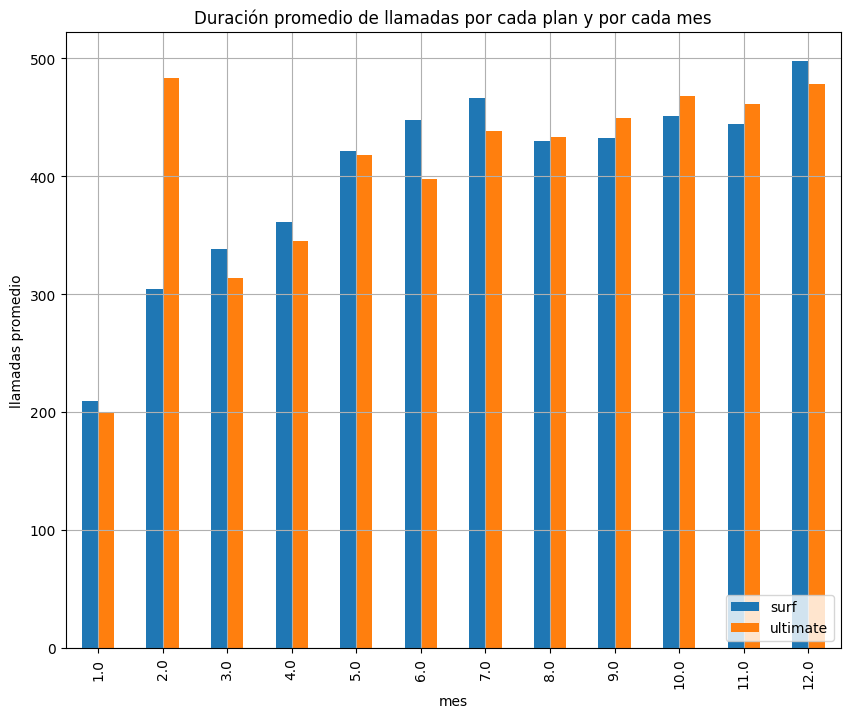

In [597]:
pd.pivot_table(full_merge,
               values=['calls_duration'],
               index=['month'],columns=['plan'],
              aggfunc='mean').plot(kind='bar',
                                  title='Duración promedio de llamadas por cada plan y por cada mes',
                                  ylabel='llamadas promedio',
                                  xlabel='mes',
                                  legend=True,
                                  figsize=(10,8))
plt.legend(['surf','ultimate'],loc='lower right')
plt.grid(True)
plt.show()

Al parecer los usuarios no hacen más llamadas si tienen un plan premium. Se comportan casi de la misma forma los usuarios que tienen el plan surf y ultimate. El único mes destacable es febrero.

In [598]:
# Calcula la media y la varianza de la duración mensual de llamadas.
#media de la duración mensual de llamdas
media_duration_calls_montly = full_merge['calls_duration'].sum()/len(full_merge['month'].unique())

In [599]:
agg_dict = {'calls_duration':'mean'}
grp = full_merge.groupby('month')
print(grp.agg(agg_dict))
media_duration_calls_montly = grp.agg(agg_dict).mean()

print("\n\nLa media de la duración mensual de llamadas es: {result:.2f}\n\n"
                                                      .format(result = media_duration_calls_montly.mean()))

print("La varianza de la duración mensual de llamadas es {result:.2f}\n\n"
                                                      .format(result = np.var(grp.agg(agg_dict)['calls_duration'])))


print(grp.agg(agg_dict).describe())

       calls_duration
month                
1.0        203.166667
2.0        376.000000
3.0        330.028571
4.0        356.169014
5.0        420.490385
6.0        431.460993
7.0        456.877095
8.0        430.704348
9.0        437.657040
10.0       456.281899
11.0       449.436725
12.0       491.200000


La media de la duración mensual de llamadas es: 403.29


La varianza de la duración mensual de llamadas es 5578.44


       calls_duration
count       12.000000
mean       403.289395
std         78.010035
min        203.166667
25%        371.042254
50%        431.082670
75%        451.148018
max        491.200000


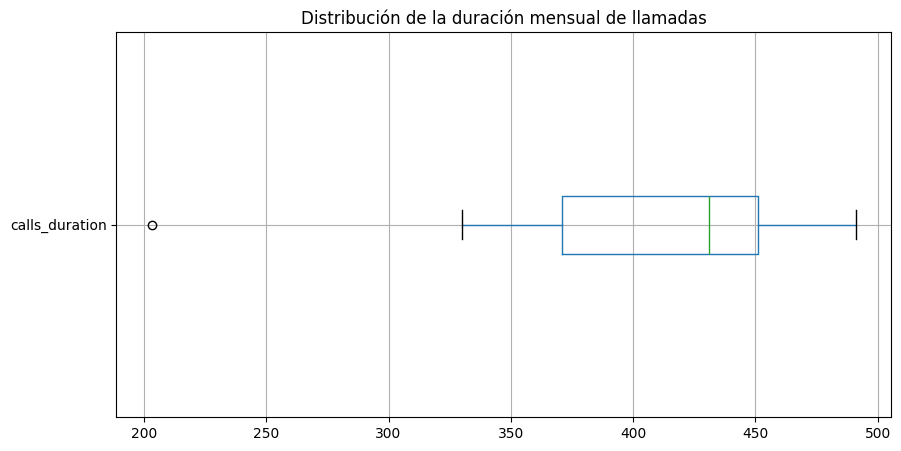

In [600]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
grp.agg(agg_dict).boxplot(vert=False,
                         figsize=(10,5))
plt.title('Distribución de la duración mensual de llamadas')
plt.show()

In [601]:
calls_duration_mean_surf = pd.pivot_table(full_merge,
               values='calls_duration',
               index=['month'],columns=['plan'],
              aggfunc='mean')['surf']
calls_duration_mean_ultimate = pd.pivot_table(full_merge,
               values='calls_duration',
               index=['month'],columns=['plan'],
              aggfunc='mean')['ultimate']

In [602]:
print(calls_duration_mean_surf,'\n\n')

print(calls_duration_mean_ultimate)


print("\n\nLa media de la duración mensual de llamadas pertenecientes al plan surf es: {result:.2f}\n\n"
                                                      .format(result = calls_duration_mean_surf.mean()))

print("\n\nLa media de la duración mensual de llamadas pertenecientes al plan ultimate es: {result:.2f}\n\n"
                                                      .format(result = calls_duration_mean_ultimate.mean()))

print("\n\nLa varianza de la duración mensual de llamadas pertenecientes al plan surf es {result:.2f}\n\n"
                                                      .format(result = np.var(calls_duration_mean_surf)))

print("\n\nLa varianza de la duración mensual de llamadas pertenecientes al plan surf es {result:.2f}\n\n"
                                                      .format(result = np.var(calls_duration_mean_ultimate)))

month
1.0     209.000000
2.0     304.555556
3.0     338.565217
4.0     360.720000
5.0     421.506667
6.0     447.187500
7.0     465.958333
8.0     429.452830
9.0     432.267016
10.0    451.017241
11.0    444.068592
12.0    497.430868
Name: surf, dtype: float64 


month
1.0     200.250000
2.0     483.166667
3.0     313.666667
4.0     345.333333
5.0     417.862069
6.0     397.911111
7.0     438.406780
8.0     433.507042
9.0     449.627907
10.0    467.914286
11.0    461.238095
12.0    478.194631
Name: ultimate, dtype: float64


La media de la duración mensual de llamadas pertenecientes al plan surf es: 400.14




La media de la duración mensual de llamadas pertenecientes al plan ultimate es: 407.26




La varianza de la duración mensual de llamadas pertenecientes al plan surf es 6157.79




La varianza de la duración mensual de llamadas pertenecientes al plan surf es 6373.98




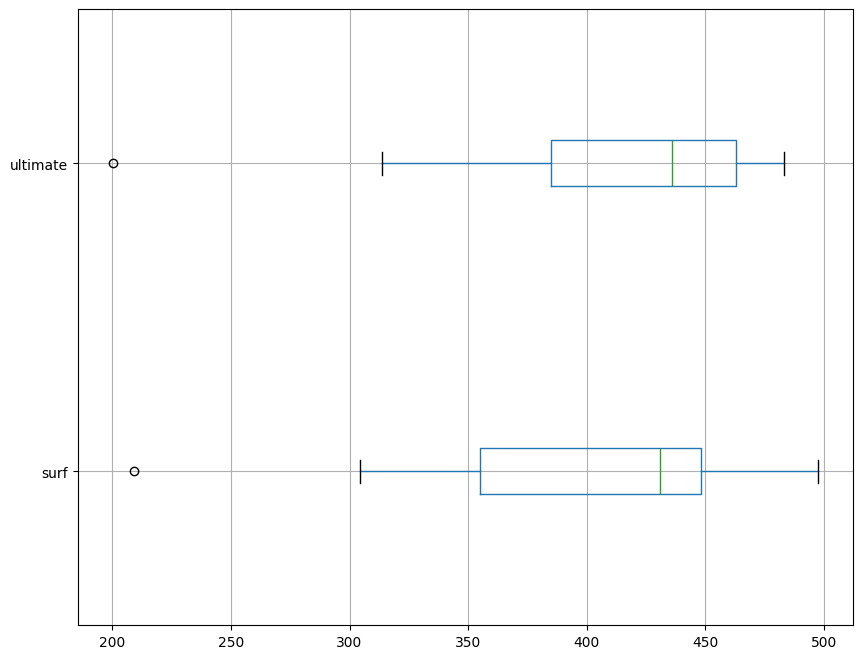

In [603]:
pd.pivot_table(full_merge,
               values='calls_duration',
               index=['month'],columns=['plan'],
              aggfunc='mean').boxplot(vert=False,
                                     figsize=(10,8))
plt.show()

La media de la duración de llamadas mensual de cada plan están sesgados a la derecha o tienen asimetría negativa; por lo tanto la mediana es mayor que la media. (También implica que no importa el plan que tengan, los usuarios van a hacerer ciertos números de llamadas que duren cierta cantidad específica) En función al plan, el comportamiento varía muy poco; solo algunos usuarios ultimate tienden a tener llamadas más largas.

### Mensajes

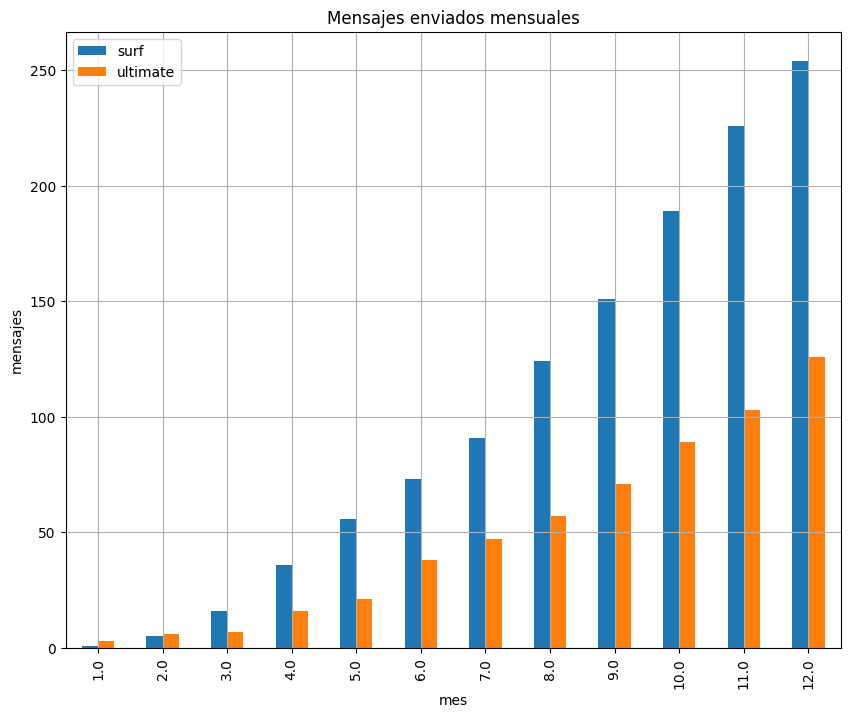

In [604]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
full_merge
pd.pivot_table(full_merge,
               values='messages_amount',
               index='month',
               columns='plan',
               aggfunc='count').plot(kind='bar',
                                  title='Mensajes enviados mensuales',
                                  ylabel='mensajes',
                                  xlabel='mes',
                                  legend=True,
                                    figsize=(10,8))
plt.legend(['surf','ultimate'],loc='upper left')
plt.grid(True)
plt.show()


De forma curiosa los usuarios que tienen un plan inferior suelen enviar más mensajes que los usuarios que tienen un mejor plan.

### Internet

In [605]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
# pd.pivot_table(full_merge,
#                values='gb_used',
#                index='user_id',
#                columns='plan',
#                aggfunc='sum').mean().plot(kind='bar',
#                                           title='Promedio de cantidad de tráfico de Internet consumido por usuarios por plan')
# plt.show()

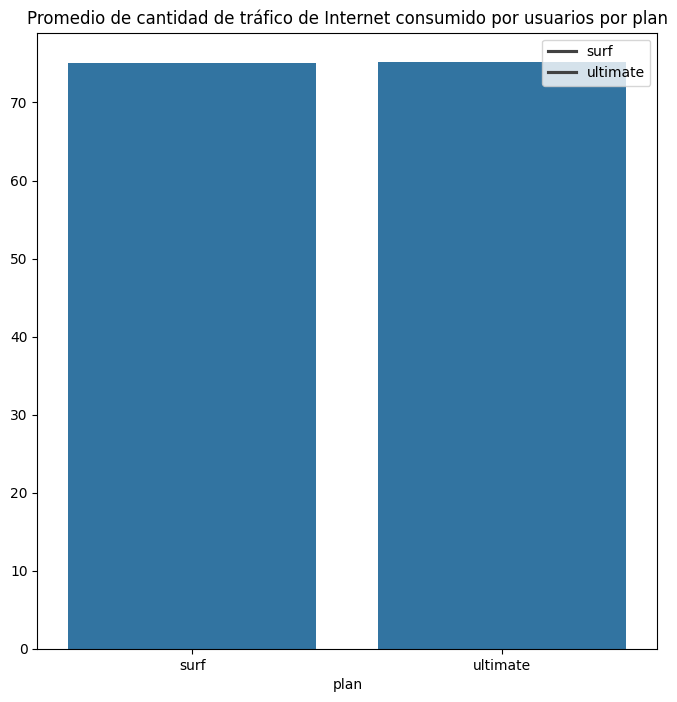

In [606]:
data = pd.pivot_table(full_merge,
               values='gb_used',
               index='user_id',
               columns='plan',
               aggfunc='sum').mean()
plt.figure(figsize=(8, 8))
plt.title('Promedio de cantidad de tráfico de Internet consumido por usuarios por plan')
sns.barplot(data=data)
# width = 5
# height = 8
# sns.set(rc = {'figure.figsize':(width,height)})
# sns.Plot.layput(size=(5,8))
plt.legend(data.index)
plt
plt.show()


Haciendo la agrupación de el tráfico de internet por usuario por plan, me percaté que sería muy complicado hacer una gráfica con estos datos. Por lo que, a apartir de esa agrupación, calculé el promedio de tráfico que genera cada usuario según su plan.
Parece que los usuarios ultimate no aprovechan el paquete que les ofrece de tráficod e internet según su plan en promedio.

## Ingreso

In [607]:
plans

,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,500,20,10,0.03,0.03,surf,15.0
1,1000,3000,70,7,0.01,0.01,ultimate,30.0


In [608]:
plans.describe()

,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included
count,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000
mean,525.000000,1750.000000,45.000000,8.50000,0.020000,0.020000,22.500000
std,671.751442,1767.766953,35.355339,2.12132,0.014142,0.014142,10.606602
min,50.000000,500.000000,20.000000,7.00000,0.010000,0.010000,15.000000
25%,287.500000,1125.000000,32.500000,7.75000,0.015000,0.015000,18.750000
50%,525.000000,1750.000000,45.000000,8.50000,0.020000,0.020000,22.500000
75%,762.500000,2375.000000,57.500000,9.25000,0.025000,0.025000,26.250000
max,1000.000000,3000.000000,70.000000,10.00000,0.030000,0.030000,30.000000


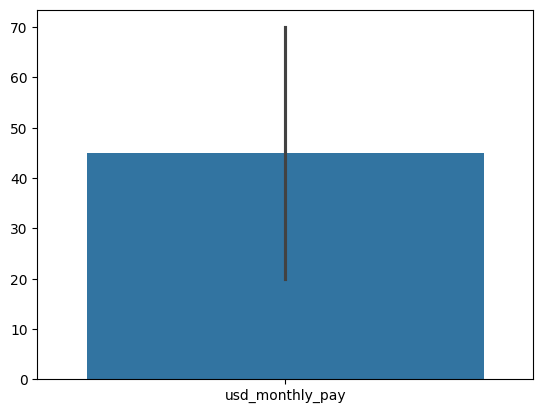

In [609]:
#Graficar barras caunto gb ogrece cada plan
data = pd.pivot_table(plans,values='usd_monthly_pay',index='plan_name',aggfunc='sum')
sns.barplot(data=data)
plt.show()

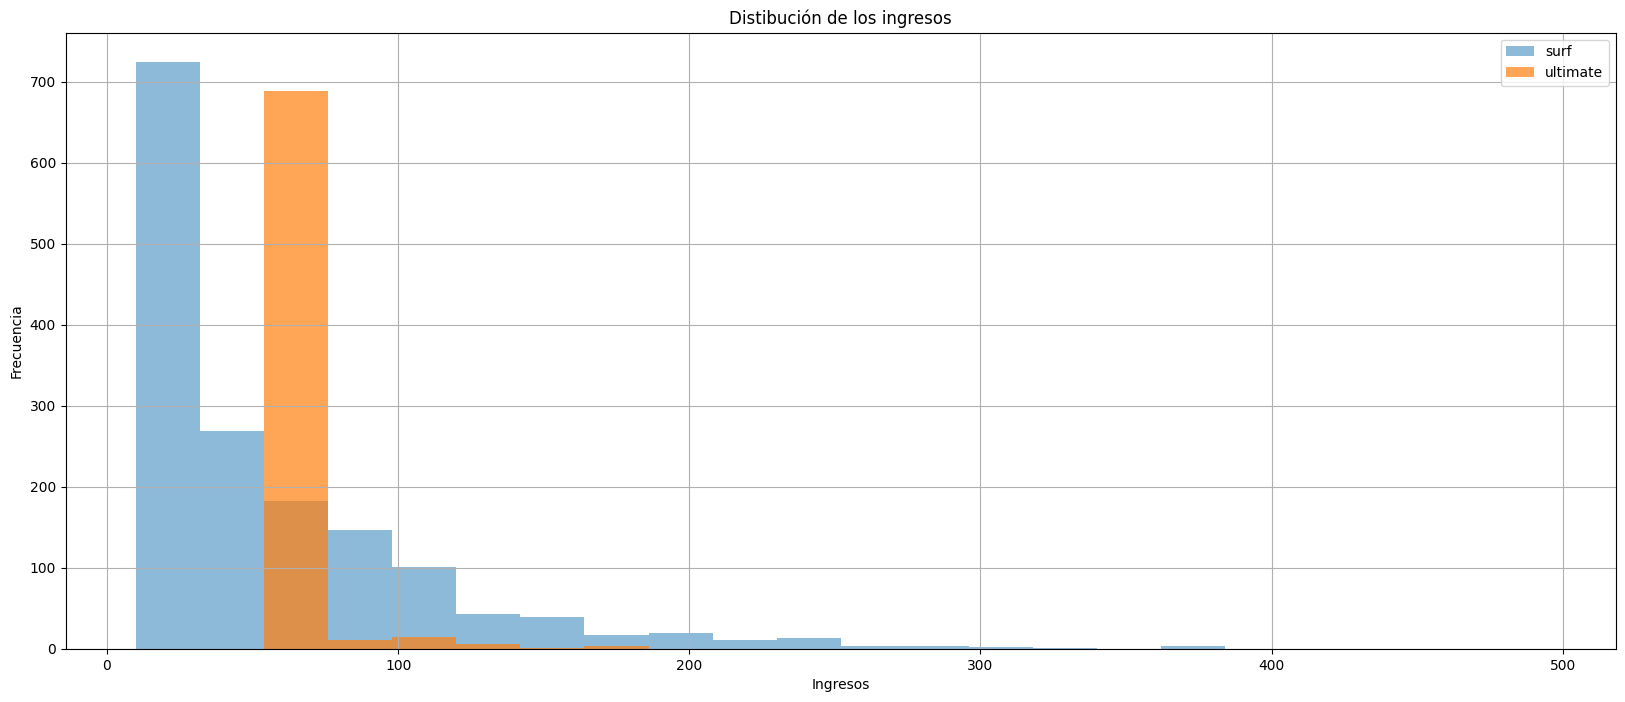

In [610]:
plt.figure(figsize=(20,8))
full_merge[full_merge['plan'] == 'surf']['total_fee'].hist(bins=np.arange(10,500,22),alpha=0.5)
full_merge[full_merge['plan'] == 'ultimate']['total_fee'].hist(bins=np.arange(10,500,22),alpha=0.7)
plt.xlabel('Ingresos')
plt.ylabel('Frecuencia')
plt.title('Distibución de los ingresos')
plt.legend(['surf','ultimate'])
plt.show()

In [611]:
#Caluclo para ibtener intervalos
1 + 3.22*math.log1p(len(full_merge[full_merge['plan'] == 'ultimate']))

22.207472728632055


Haciendo una gráfica de barras de los ingresos, únicamente hay dos planes; surf y ultimate, el cual va a estar cobrando la empresa a los usuarios mensualmente, según sea su plan. El plan básico cuesta unos 20 dólares, y por otro lado el plan premium cuesta 70; más de triple de segundo. Para contestar a la pregunta, ¿por qué más caro? es debido a que ofrece mejores caracterícticas ese plan.

Viendo la distribución de los ingresos por los dos planes, observamos que los ingresos están considerablemente sesgados hacia la derecha. La mayoría de los usuarios ultimate no gastan más de lo que cuesta el plan.

## Prueba las hipótesis estadísticas

Se probará la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf y se elaborará las hipótesis nula y alternativa, escoge la prueba estadística, determinar el valor alfa.

In [612]:
# Prueba las hipótesis
data = pd.pivot_table(full_merge,values='total_fee',index='user_id',columns='plan')
print(data)
sample_surf = data['surf']
sample_ultimate = data['ultimate']
sample_surf = sample_surf.dropna()
sample_ultimate = sample_ultimate.dropna()

alpha = 0.05

results = st.ttest_ind(
sample_surf,
sample_ultimate)

print('valor p: ', results.pvalue) # extraer el valor p

if results.pvalue < alpha: # comparar el valor p con el umbral
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

plan           surf  ultimate
user_id                      
1000            NaN      70.0
1001      47.603879       NaN
1002      32.972266       NaN
1003     153.152930       NaN
1004      72.617151       NaN
...             ...       ...
1495     112.340508       NaN
1496      24.117695       NaN
1497            NaN      70.0
1498      72.483975       NaN
1499      50.031323       NaN

[500 rows x 2 columns]
valor p:  8.918194118995219e-07
Rechazamos la hipótesis nula


Aplicando la prueba de hipótesis y teniendo la hipótesis.

Obtuvimos que se rechaza la hipotesis nula. Esto quiere decir que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.

Se probará la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones y se elborará las hipótesis nula y alternativa, escoge la prueba estadística, determinar el valor alfa.

In [613]:
test = full_merge.copy()

In [614]:
test['city'] = test['city'].where(test['city'].str.contains('NY-NJ'),'other regions')

In [615]:
test['city'].unique()

array(['other regions', 'New York-Newark-Jersey City, NY-NJ-PA MSA'],
      dtype=object)

In [616]:
ny_nj_other_regions = pd.pivot_table(test,values='total_fee',index='user_id',columns='city')
ny_nj_other_regions = ny_nj_other_regions.rename(columns={"New York-Newark-Jersey City, NY-NJ-PA MSA":"ny_nj"})
ny_nj_other_regions.columns = ny_nj_other_regions.columns.str.replace(' ','_')

In [617]:
ny_nj_other_regions

city,ny_nj,other_regions
user_id,,
1000,NaN,70.000000
1001,NaN,47.603879
1002,NaN,32.972266
1003,NaN,153.152930
1004,NaN,72.617151
...,...,...
1495,112.340508,NaN
1496,NaN,24.117695
1497,NaN,70.000000


In [618]:
# Prueba las hipótesis
sample_surf = ny_nj_other_regions['ny_nj']
sample_ultimate = ny_nj_other_regions['other_regions']
sample_surf = sample_surf.dropna()
sample_ultimate = sample_ultimate.dropna()

alpha = 0.05

results = st.ttest_ind(
sample_surf,
sample_ultimate)

print('valor p: ', results.pvalue) # extraer el valor p

if results.pvalue < alpha: # comparar el valor p con el umbral
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p:  0.5434325016217569
No podemos rechazar la hipótesis nula


En este caso no podemos rechazar la hipótesis nula de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.

## Conclusión general

En este proyecto me dí cuenta de lo que mucho he aprendido y he usado muchos métodos y teoría que me han ayudado a resolver cada uno de los pasos. Hacen que estén más claro cuando lo pones en práctica y lo mucho que puedes analizar con estos datos, de los cuales eran tablas muy pequeñas, y las conclusiones/decisiones que podemos tomar al respecto. He tenido que ver el material nuevamente porque aún hay conceptos que son un tanto complicados/nuevos para mí, pero con el buen hábito de seguir aprendiendo y prácticando saldrá mucho mejor. También me he percatado lo importante qeu es la estadítica al momento de analizar y compredner los datos para tomar decisiones más precisas que nos ayuden a mejorar un proyecto. Estoy al pendiente de cualquier retroalimentación con la que pueda mejorar este proyecto.